# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕 PIZZA RESTAURANT SALES 🍕</p>

<p style="text-align:center; ">
<img src="https://media.giphy.com/media/LZhjYok6EnDCE/giphy.gif" style='width: 600px; height: 300px;'>
</p>

<p style="text-align:justify; ">
 <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">This pizza sales dataset have 12 relevant features:

     
1- Order_id: Unique identifier for each order placed by a table
     
2- Order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
     
3- Pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
     
4- Quantity: Quantity ordered for each pizza of the same type and size
     
5- Order_date: Date the order was placed (entered into the system prior to cooking & serving)
     
6- Order_time: Time the order was placed (entered into the system prior to cooking & serving)
     
7- Unit_price: Price of the pizza in USD
     
8- Total_price: unit_price * quantity
     
9- Pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
     
10- Pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
     
11- Pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
     
12- Pizza_name: Name of the pizza as shown in the menu




 

<a id="1"></a>
# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Importing Libraries🍕</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline
#plt.style.available[:5]
from wordcloud import WordCloud, STOPWORDS


<a id="2"></a>
# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Loading Dataset🍕</p>


In [2]:
df=pd.read_csv("Data Model - Pizza Sales.csv")
df.head()

order_details_id  order_id       pizza_id  quantity order_date order_time  \
0                 1         1     hawaiian_m         1   1/1/2015   11:38:36   
1                 2         2  classic_dlx_m         1   1/1/2015   11:57:40   
2                 3         2  five_cheese_l         1   1/1/2015   11:57:40   
3                 4         2    ital_supr_l         1   1/1/2015   11:57:40   
4                 5         2     mexicana_m         1   1/1/2015   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

<a id="3"></a>
# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Exploratory Some Information About Dataset🍕</p>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
df.describe()

order_details_id      order_id      quantity    unit_price  \
count      48620.000000  48620.000000  48620.000000  48620.000000   
mean       24310.500000  10701.479761      1.019622     16.494132   
std        14035.529381   6180.119770      0.143077      3.621789   
min            1.000000      1.000000      1.000000      9.750000   
25%        12155.750000   5337.000000      1.000000     12.750000   
50%        24310.500000  10682.500000      1.000000     16.500000   
75%        36465.250000  16100.000000      1.000000     20.250000   
max        48620.000000  21350.000000      4.000000     35.950000   

        total_price  
count  48620.000000  
mean      16.821474  
std        4.437398  
min        9.750000  
25%       12.750000  
50%       16.500000  
75%       20.500000  
max       83.000000

In [5]:
df.shape

(48620, 12)

In [6]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [7]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [8]:
df['order_time']=df['order_time'].astype('string')
df[['Hour','Minute', 'Second']]= df['order_time'].str.split(":",expand=True)
df["Hour"].value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: Int64

<a id="4"></a>
# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Data Visualization🍕</p>


C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\3402775458.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Hour",palette="plasma")


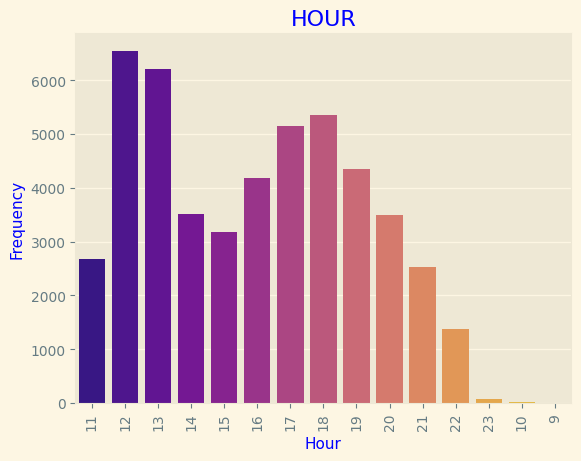

In [9]:
sns.countplot(data=df,x="Hour",palette="plasma")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=11,color="blue")
plt.ylabel("Frequency",fontsize=11,color="blue")
plt.title("HOUR",color="blue")
plt.show()

In [10]:
df['order_year'] =pd.DatetimeIndex( df['order_date']).year
df['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

In [11]:
#'order_date' is a string column containing dates
df['order_date'] = pd.to_datetime(df['order_date'])

# Now you can create the 'order_dates' column and count the occurrences
df['order_dates'] = df['order_date'].dt.day_name()
print(df['order_dates'].value_counts())

order_dates
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: count, dtype: int64


C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\4189068428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="order_dates",palette="viridis")


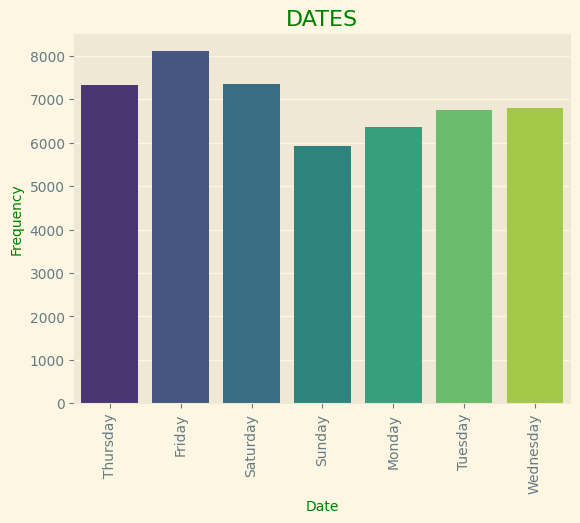

In [12]:
sns.countplot(data=df,x="order_dates",palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()

In [13]:
df['order_month'] =pd.DatetimeIndex (df['order_date']).month
df.loc[(df['order_month'] ==1), 'order_month'] = 'January'
df.loc[(df['order_month'] ==2), 'order_month'] = 'February'
df.loc[(df['order_month'] ==3), 'order_month'] = 'March'
df.loc[(df['order_month'] ==4), 'order_month'] = 'April'
df.loc[(df['order_month'] ==5), 'order_month'] = 'May'
df.loc[(df['order_month'] ==6), 'order_month'] = 'June'
df.loc[(df['order_month'] ==7), 'order_month'] = 'July'
df.loc[(df['order_month'] ==8), 'order_month'] = 'August'
df.loc[(df['order_month'] ==9), 'order_month'] = 'September'
df.loc[(df['order_month'] ==10), 'order_month'] = 'October'
df.loc[(df['order_month'] ==11), 'order_month'] = 'November'
df.loc[(df['order_month'] ==12), 'order_month'] = 'December'
df['order_month'].value_counts()


C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\2287036114.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'January' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df['order_month'] ==1), 'order_month'] = 'January'


order_month
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: count, dtype: int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\1478589593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="order_month",palette="CMRmap")


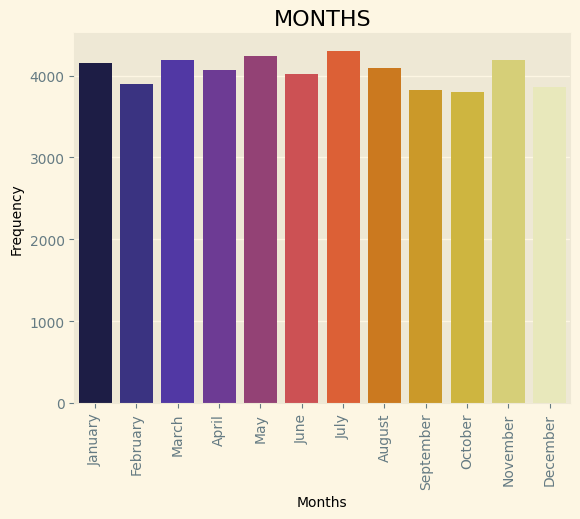

In [14]:
#visualizing the frequency of orders made in each month using a seaborn countplot. 
sns.countplot(data=df,x="order_month",palette="CMRmap")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("MONTHS",color="black")
plt.show()

In [15]:
df.pizza_id.value_counts()

pizza_id
big_meat_s        1811
thai_ckn_l        1365
five_cheese_l     1359
four_cheese_l     1273
classic_dlx_m     1159
                  ... 
mexicana_s         160
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      94
the_greek_xxl       28
Name: count, Length: 91, dtype: int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\346724903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)


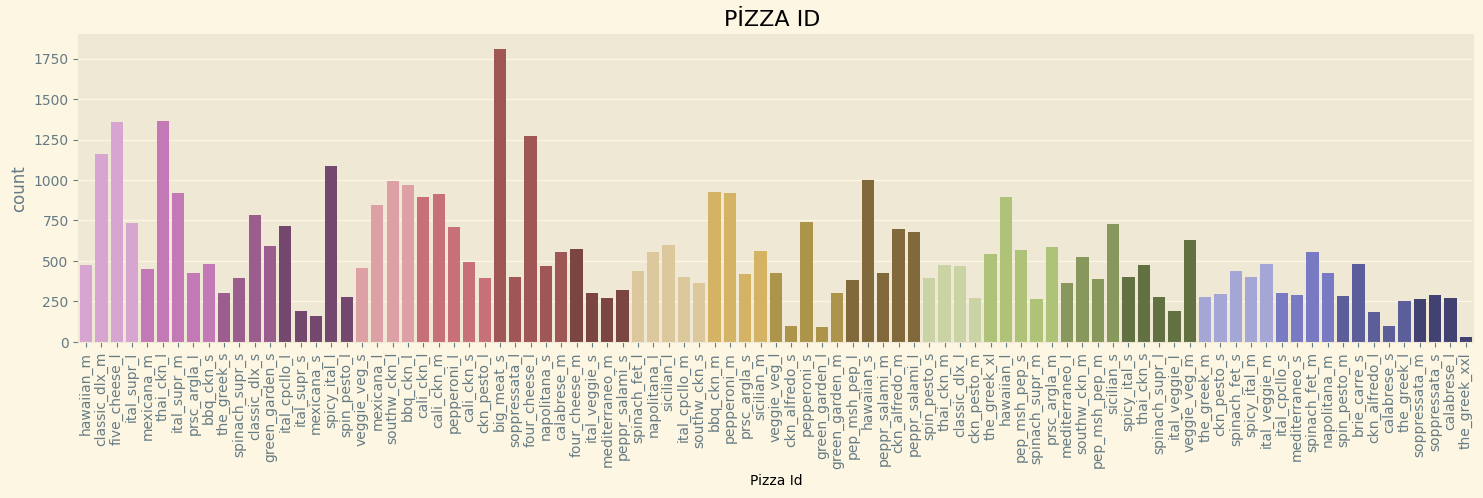

In [16]:
#visualize the frequency of each unique pizza ID in the DataFrame df
fig, ax = plt.subplots(figsize=(18, 4))
sns.countplot(data=df,x="pizza_id",palette="tab20b_r",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Pizza Id",fontsize=10,color="black")
plt.title("PİZZA ID ",color="black")
plt.show()

In [17]:
df.quantity.value_counts()

quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\4160673874.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="quantity",palette="Set1")


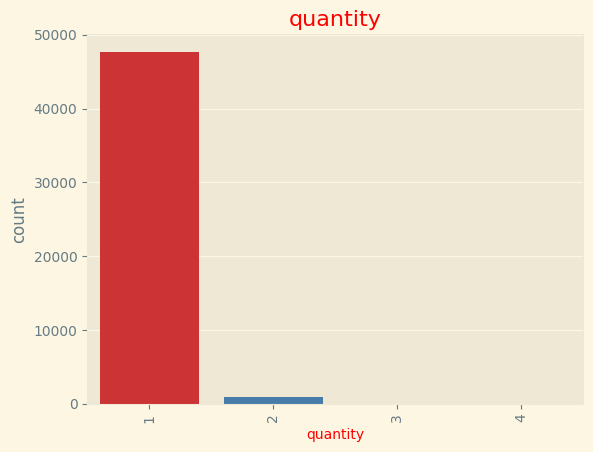

In [18]:
sns.countplot(data=df,x="quantity",palette="Set1")
plt.xticks(rotation=90)
plt.xlabel("quantity",fontsize=10,color="red")
plt.title("quantity",color="red")
plt.show()

In [19]:
df.pizza_size.value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\151453941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="pizza_size",palette="coolwarm_r")


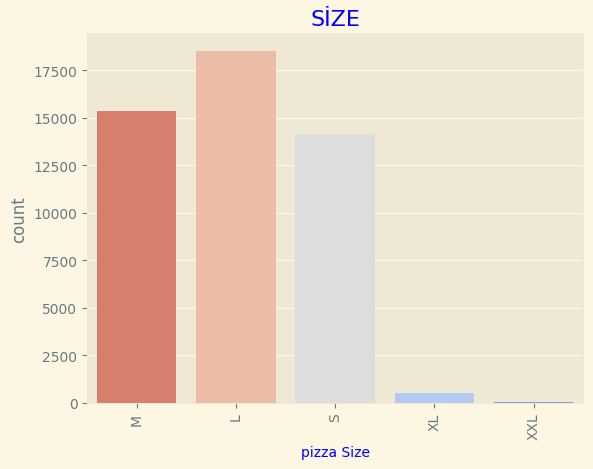

In [20]:
sns.countplot(data=df,x="pizza_size",palette="coolwarm_r")
plt.xticks(rotation=90)
plt.xlabel("pizza Size",fontsize=10,color="b")
plt.title("SİZE",color="b")
plt.show()

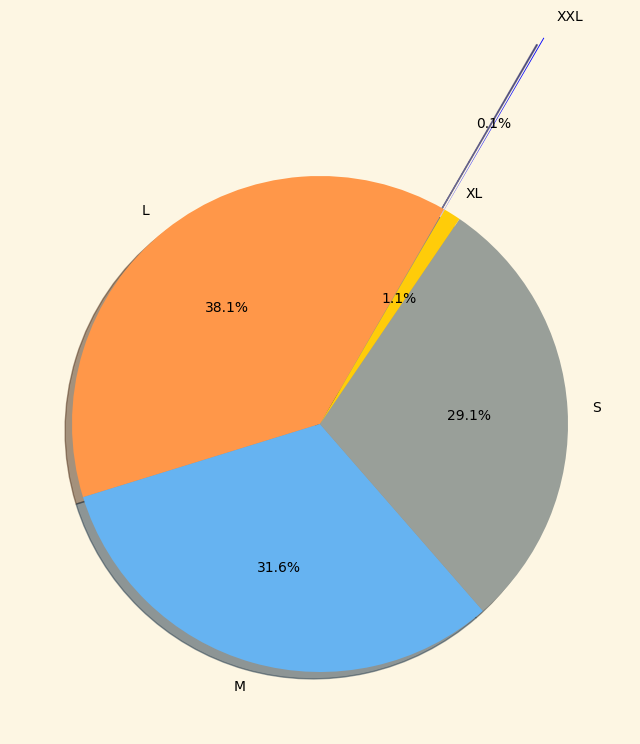

In [21]:
#a pie chart to visualize the distribution of pizza sizes in the DataFrame df
labels = df["pizza_size"].value_counts().index
sizes = df["pizza_size"].value_counts()
plt.figure(figsize = (8,10))

colors = ['#ff9749','#66b3f1','#999f99','#ffcc09',"BLUE","cyan"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=60,explode=(0,0,0,0,0.8))
plt.show()

In [22]:
df.pizza_category.value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\2635722567.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="pizza_category",palette="Oranges")


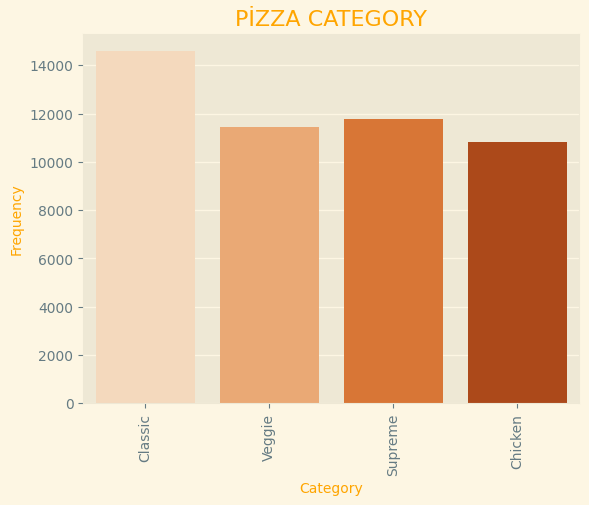

In [23]:
sns.countplot(data=df,x="pizza_category",palette="Oranges")
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=10,color="orange")
plt.ylabel("Frequency",fontsize=10,color="orange")
plt.title("PİZZA CATEGORY",color="orange")
plt.show()

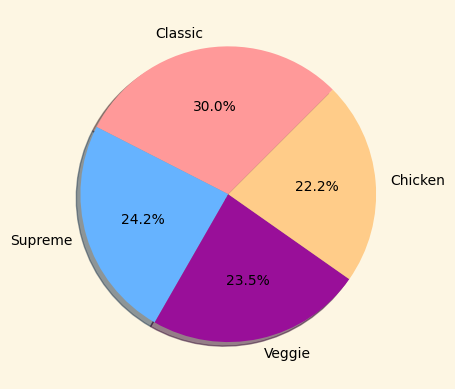

In [24]:
labels = df["pizza_category"].value_counts().index
sizes = df["pizza_category"].value_counts()
colors = ['#ff9999','#66b3ff','#990f99','#ffcc89',"pink","yellow"]
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=45)
plt.show()

In [25]:
df.Hour.value_counts()

Hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: Int64

C:\Users\Navdeep.kaur\AppData\Local\Temp\ipykernel_39992\222188484.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="Hour",palette="inferno")


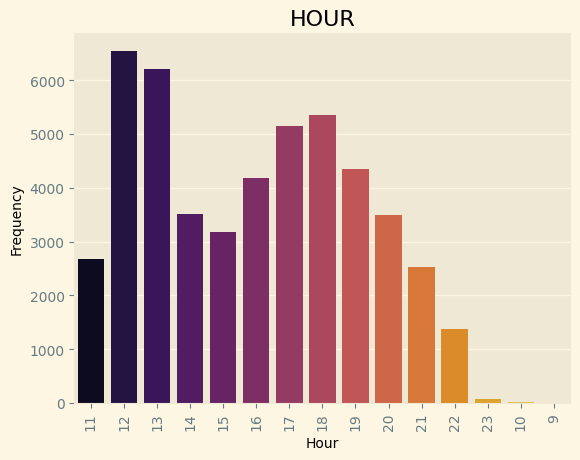

In [26]:
sns.countplot(data=df,x="Hour",palette="inferno")
plt.xticks(rotation=90)
plt.xlabel("Hour",fontsize=10,color="black")
plt.ylabel("Frequency",fontsize=10,color="black")
plt.title("HOUR",color="black")
plt.show()

In [27]:
df.pizza_ingredients.value_counts()

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

In [28]:
df.pizza_name.value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [41]:
#Bar chart to visualize the distribution of orders over different dates. 
px.bar(data_frame=df, x='order_dates',color_discrete_sequence=['blue'],
       labels={'order_dates':'count'},
       template='plotly_white',title='<b> Which day is the most ordered?')

In [42]:
px.box(df,x='pizza_name',y='total_price',
       color='pizza_name',template='seaborn',
       labels={'pizza_name':'Name','total_price':'Price'},
       title='<b>Pizza Names and Prices')

In [43]:
#Plotly Express to create both a bar chart and a pie chart to visualize the distribution of pizza categories and their corresponding total counts or values. 
z=df['pizza_category'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2',title='<b>Total Money Earned From Pizza Categories and Pie chart</b> ')
fig.show()
fig=px.pie(z,names=z.index,values=z.values,labels={'index':'pizza_category','y':'total_price','text':'total_price'},template='ggplot2')
fig.show()

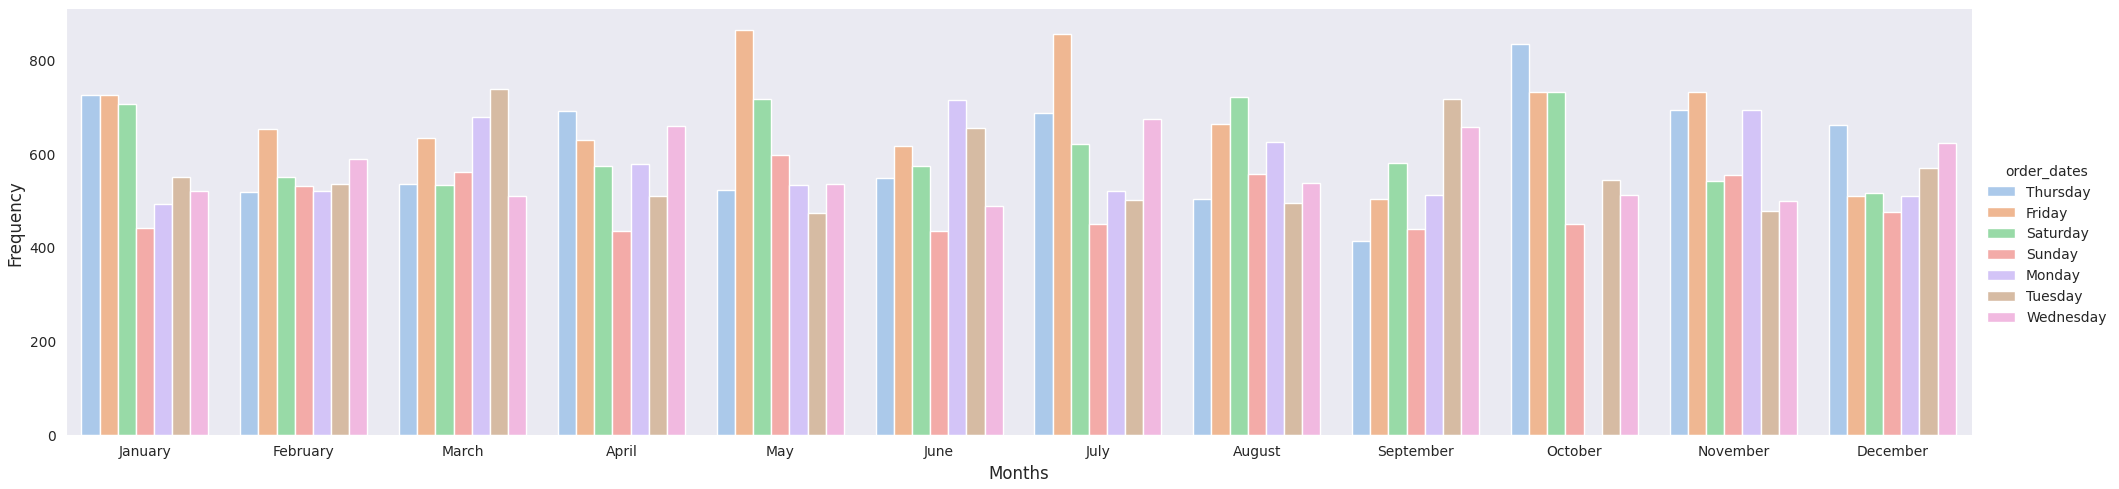

In [45]:
with sns.axes_style('dark'):
    g = sns.catplot(x="order_month", data=df, aspect=4.0, kind='count',hue='order_dates',palette="pastel")
g.set_ylabels('Frequency')
g.set_xlabels("Months")
plt.show()

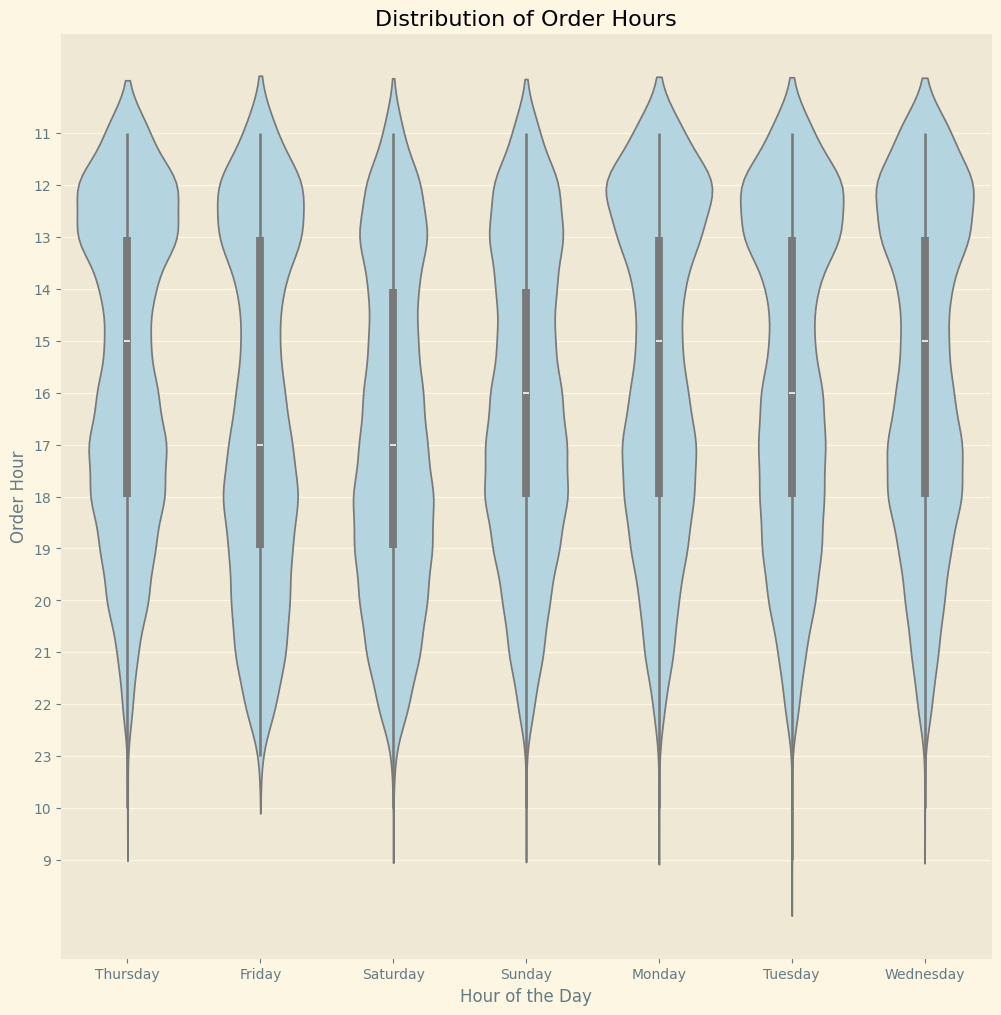

In [51]:
sns.violinplot(df,x='order_dates', y='Hour', color='lightblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Hour')
plt.title('Distribution of Order Hours')
plt.show()


In [53]:
joint_data=df.sort_values(by='total_price', ascending=False)

top_rated=joint_data[:]
fig =px.sunburst(
    top_rated,
    path=['pizza_category',"pizza_size"],
    values='total_price',
    color='total_price')
fig.show()

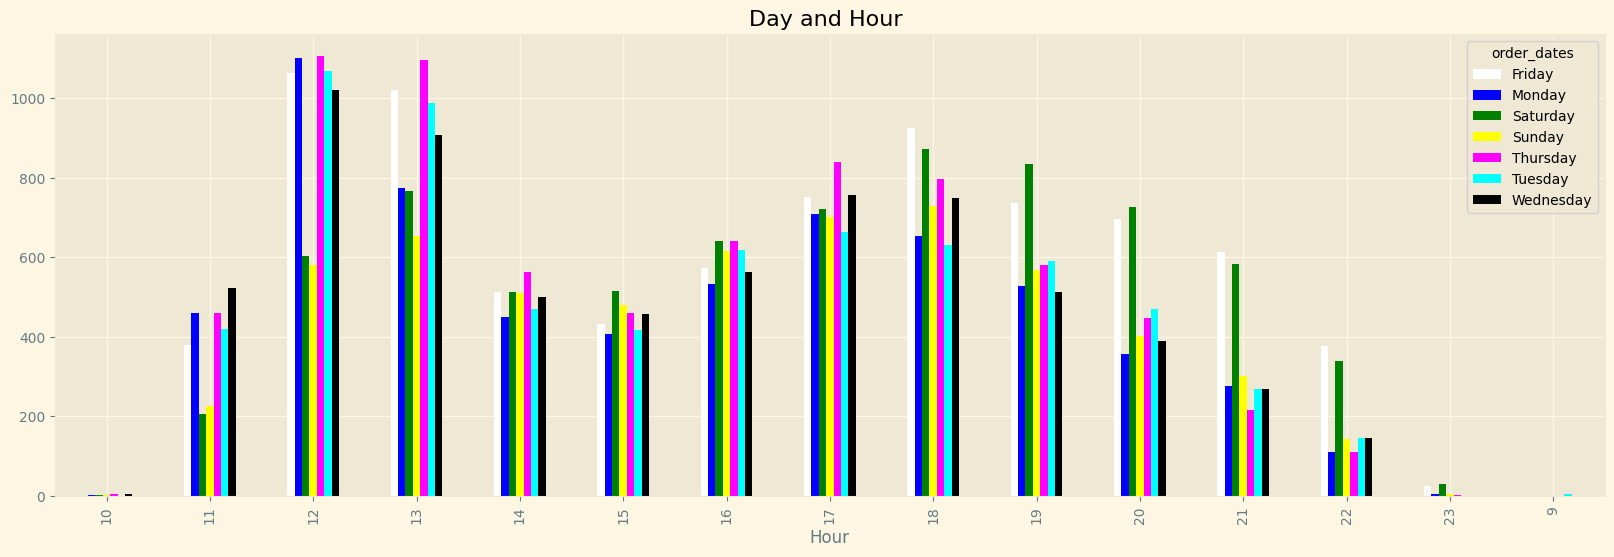

In [54]:
pd.crosstab(df["Hour"], df["order_dates"]).plot(kind="bar", figsize=(20, 6),
                                                color=["white","blue","green","yellow","magenta","cyan","black","orange"],
                                                title="Day and Hour ")
plt.show()

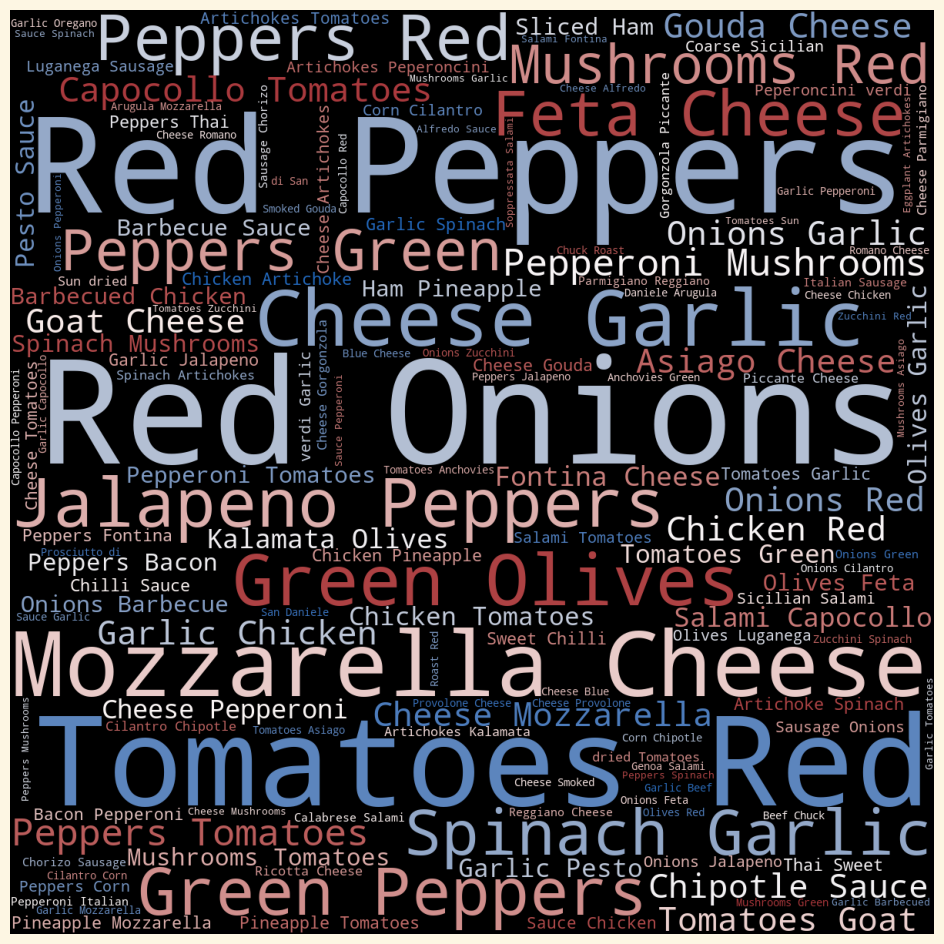

In [58]:

text = ' '.join(df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 150).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

In [39]:
fig = px.scatter(df, x = "pizza_size", y = "total_price", color = "pizza_size")
fig.show()

<a id="5"></a>
# <p style="text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">🍕Result🍕</p>

    
📌 Lunch and dinner hours, particularly around 12 PM and 7 PM, see the highest order volumes, indicating peak busy periods.

📌 The year 2015 accounts for the majority of orders, suggesting that this dataset predominantly represents data from that year.

📌 Fridays tend to have the highest number of orders compared to other days of the week.

📌 "Big meat s" pizza is the most frequently ordered item based on the provided codes.

📌 Orders typically consist of multiple items, with an average of at least 4 items per order.

📌 Large (L) size pizzas are the most commonly ordered size.

📌 Classic pizza varieties are the preferred choice among customers.

📌 Order volumes tend to increase on Fridays and Saturdays compared to other days of the week.

📌 Tomatoes, red peppers, and red onions are common ingredients found in many pizza orders.

📌 Despite opening at 9 AM, the number of orders during this hour is relatively low compared to other times of the day.